<a href="https://colab.research.google.com/github/WisdomdeSagesse/Wine-Quality/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Data Pre-Processing

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
#load dataseta

filepath_red_wine = "/content/drive/MyDrive/Datasets/winequality-red.csv"
red_wine_df = pd.read_csv(filepath_red_wine, sep = ';')

In [31]:
red_wine_df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [32]:
red_wine_df["wine type"] = 0

In [33]:
file_path_white_wine = "/content/drive/MyDrive/Datasets/winequality-white.csv"
white_wine_df = pd.read_csv(file_path_white_wine, sep = ';')

In [34]:
white_wine_df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [35]:
white_wine_df["wine type"] = 1

In [36]:
#Joining both dataframes
wine_df = pd.concat([red_wine_df, white_wine_df], ignore_index = True)

In [37]:
#check for null values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine type               0
dtype: int64

In [38]:
#checking for data imbalance in the classes

num_by_qual = wine_df.groupby('quality')['quality'].count()
num_by_qual

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [39]:
# Code to replace each values in the quality column 
# "Pandas DataFrame: replace all values in a column, based on condition", tdy February 26, 2023
# https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
# [Accessed 23/05/2023]

#Modifying the number of target variables from 7 classes to 3

conditions = {
    0: wine_df['quality'] < 5,
    1: wine_df['quality'] < 7,
    2: wine_df['quality'] > 6,
}
wine_df['quality'] = np.select(conditions.values(), conditions.keys(), default=wine_df['quality'])

In [40]:
wine_df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  wine type  
0      9.4        1          0  
1      9.8        1          0  
2      9.8        1          0  
3      9.8        1          0  
4      9.4        1          0

In [41]:
# reconfirming data imbalance with new target classes

num_by_qual = wine_df.groupby('quality')['quality'].count()
num_by_qual

quality
0     246
1    4974
2    1277
Name: quality, dtype: int64

In [42]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality    wine type  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     1.158689     0.753886  
std       0.160787     0.148806     1.192712     0.457456     0.430779  
min       2.720000     0.220000     8.000000     0.000000     0.000000  
25%       3.110000     0.430000     9.500000     1.000000     1.000000  
50%       3.210000     0.510000    10.300000     1.000000     1.000000  
75%       3.320000     0.600000    11.300000     1.000000     1.000000  
max       4.010000     2.000000    14.900000     2.000000     1.000000

In [43]:
print(f"The data has {wine_df.shape[0]} rows and {wine_df.shape[1]} columns")

The data has 6497 rows and 13 columns


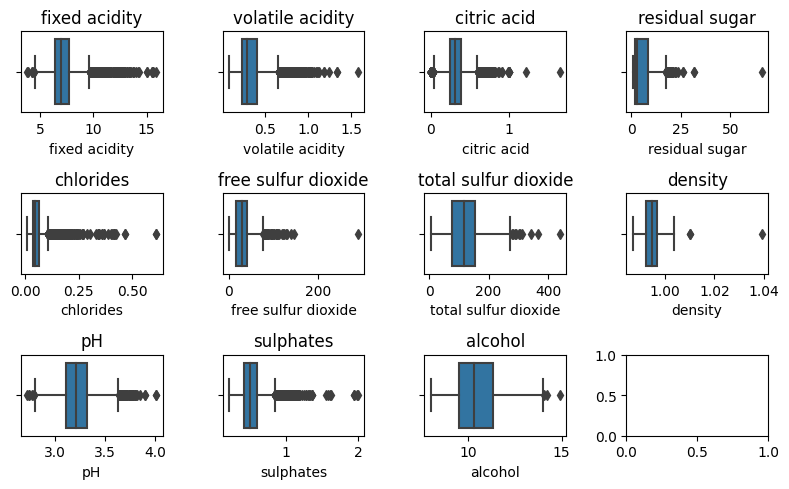

In [44]:
# Plotting the data to check for outliers 
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol' ]
fig, axs = plt.subplots(3, 4, figsize=(8, 5))
axs = axs.flatten()
for i, feature in enumerate(features):
    sns.boxplot(x = wine_df[feature], ax=axs[i])
    axs[i].set_title(feature)
    #axs[i].set_xlabel('X-axis label', fontsize=5)
fig.tight_layout() 
plt.show()

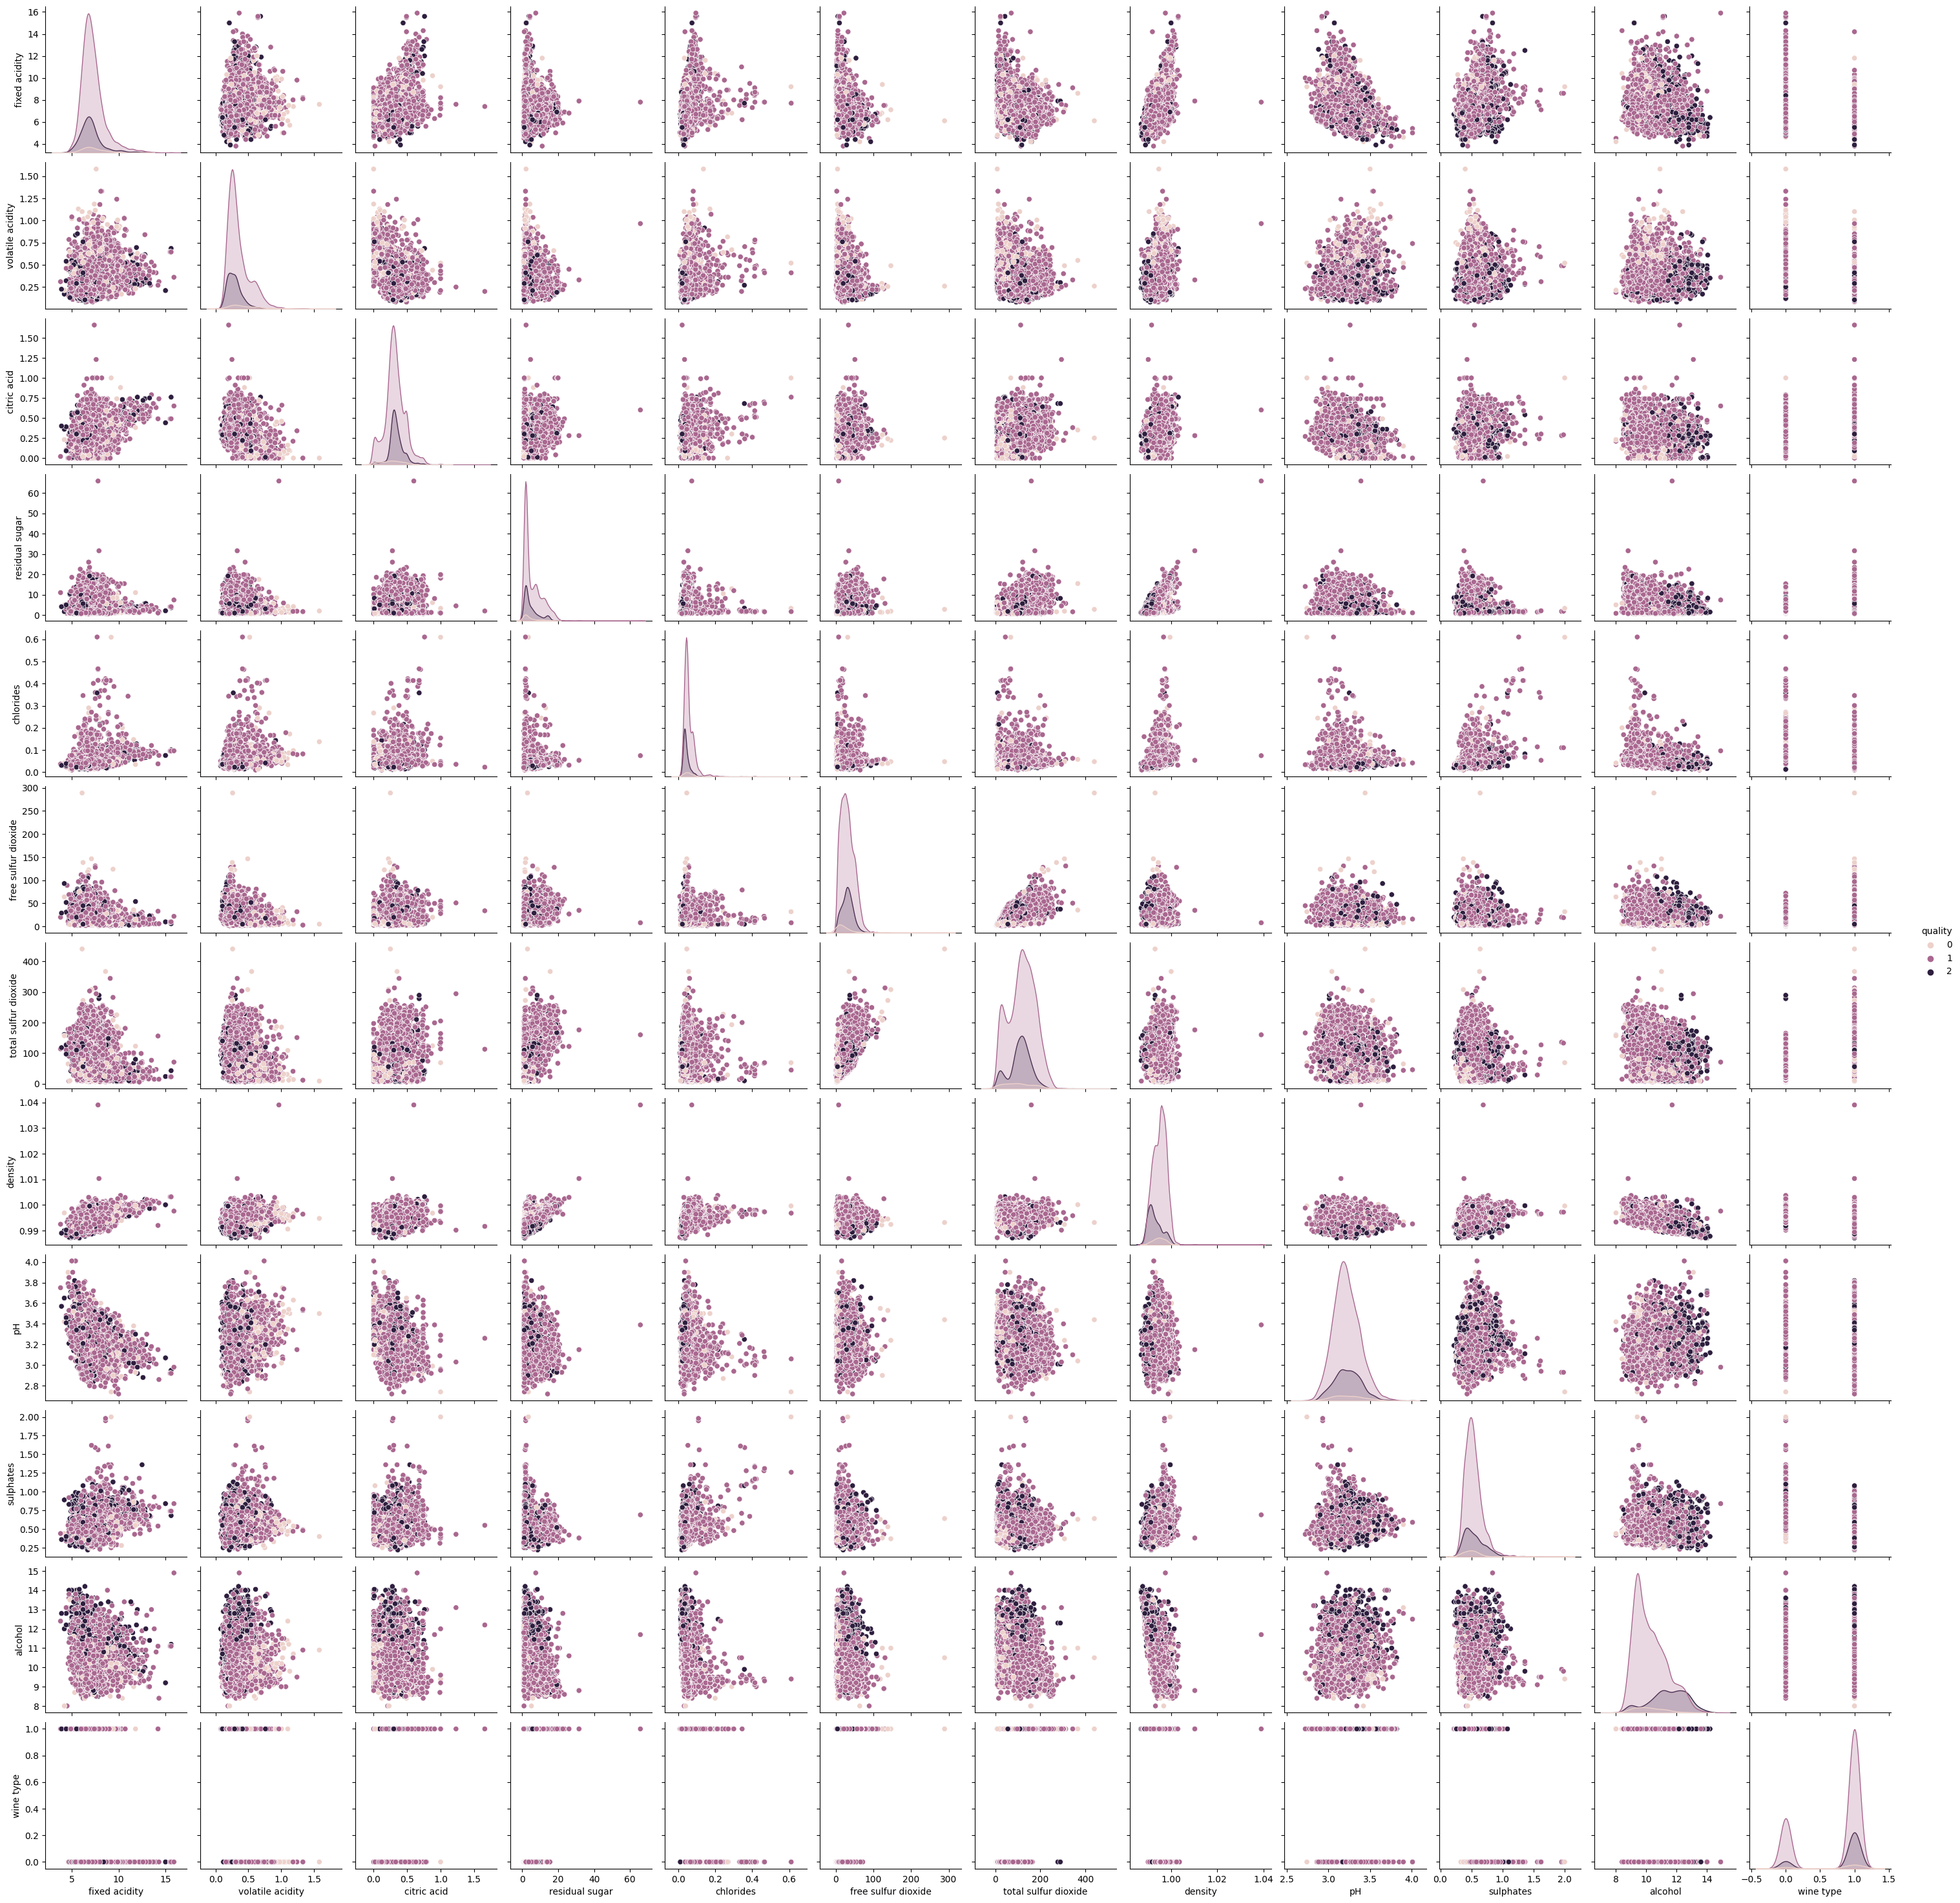

In [ ]:
sns.pairplot(wine_df, hue = 'quality')

In [45]:
#Scaling the features
scaler = StandardScaler()
features = wine_df.drop('quality', axis = 1)
X = scaler.fit_transform(features)
y = wine_df['quality']

In [46]:
#Addressing class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print(f"Class distribution before resampling: {np.bincount(y)}")
print(f"Class distribution after resampling: {np.bincount(y_resampled)}")

Class distribution before resampling: [ 246 4974 1277]
Class distribution after resampling: [4974 4974 4974]


In [87]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size = 0.7, test_size=0.3)

# Random Forest Classification

In [48]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)
# Accuracy on Training Data
prediction_test = rf.predict(X_test)
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Test Data
print("Testing Accuracy is: ", rf.score(X_test, y_test))

Training Accuracy is:  0.9217807563427477
Testing Accuracy is:  0.8633013178467724


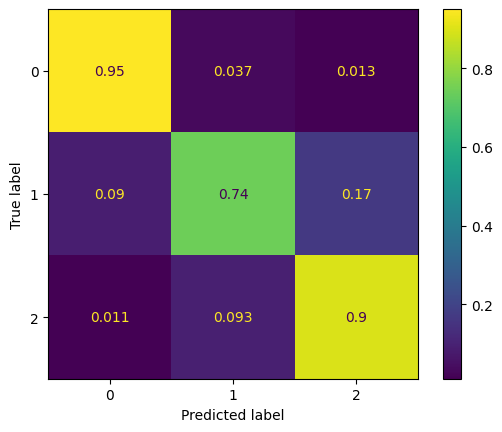

In [49]:
# plot the confusion matrix to check the model's performance
cm = confusion_matrix(y_test, prediction_test, labels = rf.classes_, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)
disp.plot()
plt.show()

## Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV
max_depth = np.arange(1,11)
n_estimators_range = np.arange(10, 210, 10)
max_features = [1, 'sqrt', 'log2']
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators_range, max_features = max_features)
rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [25]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [1, 'sqrt', 'log2'],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [ ]:
print(f"The best parameters are {grid.best_params_}, with a score of {grid.best_score_}")

The best parameters are {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 160}, with a score of 0.8578267113451412


In [52]:
#Implementing random forest using the best parameters

rf = RandomForestClassifier(n_estimators=160, max_depth=10, max_features = 'log2')
rf.fit(X_train, y_train)
# Accuracy on Training Data
prediction_test = rf.predict(X_test)
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Test Data
print("Testing Accuracy is: ", rf.score(X_test, y_test))

Training Accuracy is:  0.9188128291048349
Testing Accuracy is:  0.8633013178467724


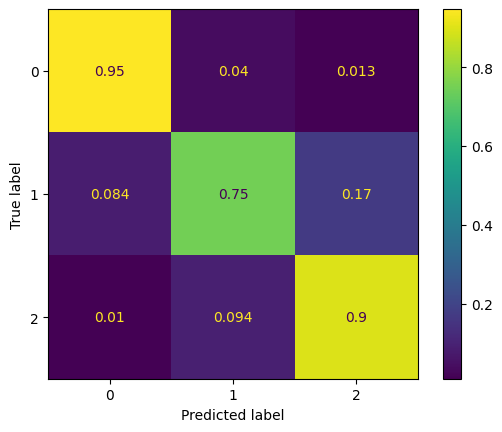

In [53]:
# plot the confusion matrix to check the model's performance
cm = confusion_matrix(y_test, prediction_test, labels = rf.classes_, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)
disp.plot()
plt.show()

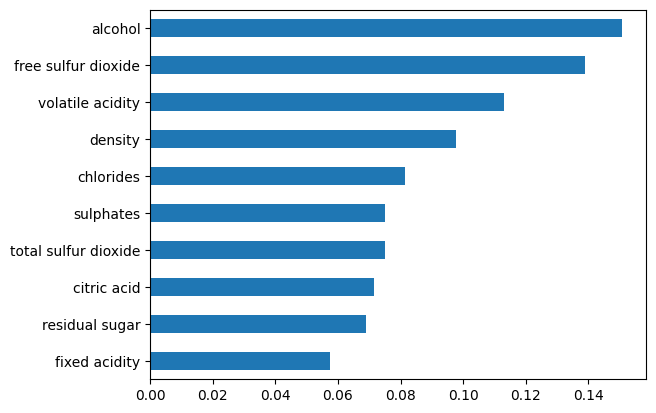

In [54]:
feat_importances = pd.Series(rf.feature_importances_, index=wine_df.drop('quality', axis = 1).columns)
feat_importances.nlargest(10).plot(kind='barh').invert_yaxis()

# MLP Classification

In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
mlp = MLPClassifier(hidden_layer_sizes = (20,15,10), activation = 'logistic', max_iter = 5000)

In [57]:
mlp.fit(X_train, y_train)
# Accuracy on Training Data
mlp_prediction_test = mlp.predict(X_test)
print("Training Accuracy is: ", mlp.score(X_train, y_train))
# Accuracy on Test Data
print("Testing Accuracy is: ", mlp.score(X_test, y_test))

Training Accuracy is:  0.8435615126854955
Testing Accuracy is:  0.8177350904623631


# KMeans Clustering

In [59]:
from sklearn.cluster import KMeans

In [60]:
#using the elbow method to determine the optimum number of clusters
input_features = X_resampled
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, n_init= 'auto', init = 'k-means++', random_state = 0)
    kmeans.fit(input_features)
    wcss.append(kmeans.inertia_)

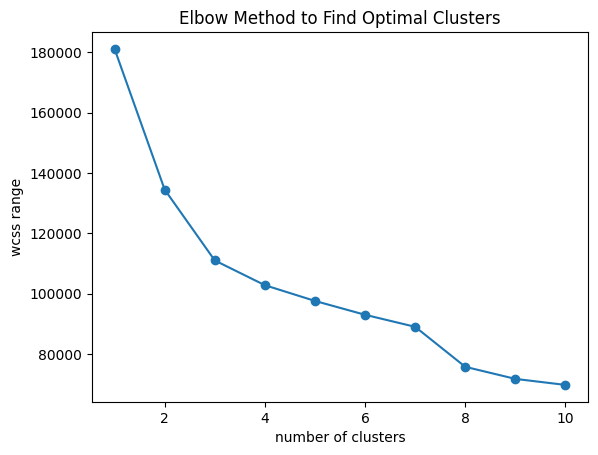

In [61]:
#plotting the graph
plt.plot(range(1,11), wcss, marker = 'o')
plt.title("Elbow Method to Find Optimal Clusters")
plt.xlabel("number of clusters")
plt.ylabel("wcss range")
plt.show()

In [63]:
#using the optimum number of cluster (3) gotten from the elbow method to model the data
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 'auto', random_state = 0)
kmeans.fit(input_features)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [64]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
labels = kmeans.labels_

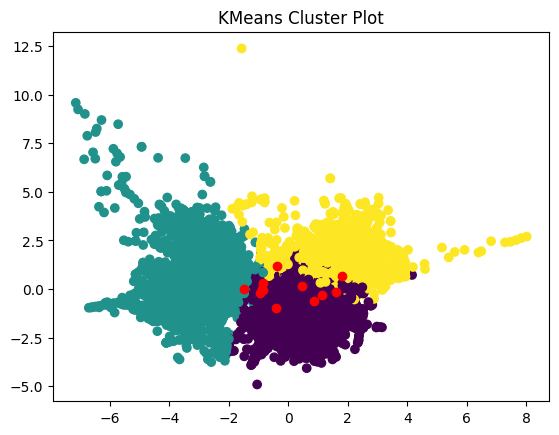

In [67]:
#plotting the clusters
from sklearn.decomposition import PCA
pca = PCA(2)
X_2d = pca.fit_transform(input_features)
centroids_2d = pca.fit_transform(centroids.T)
plt.title("KMeans Cluster Plot")
plt.scatter(x=X_2d[:,0], y=X_2d[:,1], c=labels)
plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], c= 'red')
plt.show()

# Convolutional Neural Network

In [68]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [72]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [74]:
input_shape = (X_train_cnn.shape[1], 1)
cnn = models.Sequential([
    #cnn
    layers.Conv1D(filters = 32, activation = 'relu', kernel_size = 3, input_shape = input_shape),
    layers.MaxPooling1D(2),

    layers.Conv1D(filters = 64, activation = 'relu', kernel_size = 3),
    layers.MaxPooling1D(2),  

    #dense
    layers.Dense(64, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')  
  ])

In [76]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [77]:
cnn.fit(X_train_cnn, y_train, epochs = 10)

Epoch 1/10
327/327 [==============================] - 5s 4ms/step - loss: 0.8265 - accuracy: 0.6225
Epoch 2/10
327/327 [==============================] - 1s 3ms/step - loss: 0.6751 - accuracy: 0.6986
Epoch 3/10
327/327 [==============================] - 1s 3ms/step - loss: 0.6320 - accuracy: 0.7262
Epoch 4/10
327/327 [==============================] - 1s 3ms/step - loss: 0.6044 - accuracy: 0.7367
Epoch 5/10
327/327 [==============================] - 1s 3ms/step - loss: 0.5781 - accuracy: 0.7514
Epoch 6/10
327/327 [==============================] - 1s 3ms/step - loss: 0.5606 - accuracy: 0.7591
Epoch 7/10
327/327 [==============================] - 1s 3ms/step - loss: 0.5430 - accuracy: 0.7661
Epoch 8/10
327/327 [==============================] - 1s 3ms/step - loss: 0.5163 - accuracy: 0.7801
Epoch 9/10
327/327 [==============================] - 1s 3ms/step - loss: 0.5022 - accuracy: 0.7854
Epoch 10/10
327/327 [==============================] - 1s 3ms/step - loss: 0.4885 - accuracy: 0.7892

In [78]:
cnn.evaluate(X_test, y_test)

140/140 [==============================] - 1s 3ms/step - loss: 0.5025 - accuracy: 0.7970


[0.5025007128715515, 0.7969622611999512]

In [89]:
#Evaluating classification performance
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

140/140 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      1447
           1       0.77      0.66      0.71      1496
           2       0.82      0.84      0.83      1534

    accuracy                           0.81      4477
   macro avg       0.80      0.81      0.80      4477
weighted avg       0.80      0.81      0.80      4477



In [86]:
print(y_test)

6
